In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite, factorial

In [4]:
# Supongamos que tienes los siguientes datos
r = np.linspace(0.5, 5.0, 1000)       # grilla espacial
dr = r[1] - r[0]                      # paso de malla

# Función de onda (por ejemplo, una gaussiana centrada en 2.0)
psi = np.exp(-(r - 2.0)**2)

# Autofunción vibracional (digamos, la del oscilador armónico v=0)
phi_v = np.exp(-r**2)

# Normalizamos ambas funciones
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dr)
phi_v /= np.sqrt(np.sum(np.abs(phi_v)**2) * dr)

# Producto escalar (proyección)
inner_product = np.sum(np.conj(phi_v) * psi) * dr

# Probabilidad
P_v = np.abs(inner_product)**2

print(f"Proyección al estado vibracional v=0: {P_v:.6f}")

Proyección al estado vibracional v=0: 0.081478


Probabilidad en estado n=0: 0.135335
Probabilidad en estado n=1: 0.270671
Probabilidad en estado n=2: 0.270671
Probabilidad en estado n=3: 0.180447
Probabilidad en estado n=4: 0.090224
Probabilidad en estado n=5: 0.036089
Probabilidad en estado n=6: 0.012030
Probabilidad en estado n=7: 0.003437
Probabilidad en estado n=8: 0.000859
Probabilidad en estado n=9: 0.000191


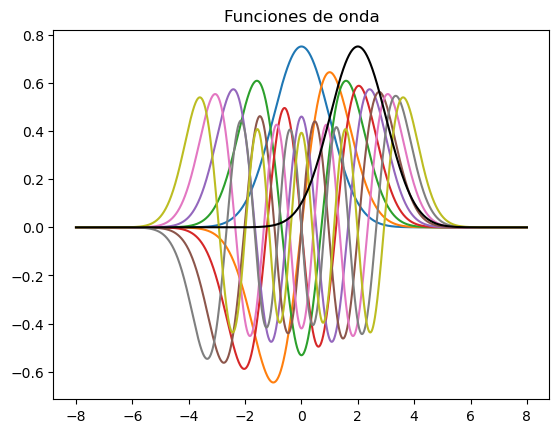

In [7]:
# --- Parámetros del oscilador armónico ---
m = 1.0      # masa
w = 1.0      # frecuencia
hbar = 1.0   # constantes naturales
alpha = np.sqrt(m * w / hbar)

# --- Grilla ---
x = np.linspace(-8, 8, 2000)
dx = x[1] - x[0]

# --- Funciones propias del oscilador armónico ---
def ho_wavefunction(n, x):
    Hn = eval_hermite(n, alpha * x)
    norm = (alpha / np.pi**0.5)**0.5 / np.sqrt(2**n * factorial(n))
    return norm * Hn * np.exp(-0.5 * (alpha * x)**2)

# --- Función de onda de prueba: gaussiana desplazada ---
x0 = 2.0
psi = np.exp(-0.5 * (x - x0)**2)
# normalizar
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)

# --- Proyecciones ---
nmax = 10
projections = []
for n in range(nmax):
    phi_n = ho_wavefunction(n, x)
    # normalizar (por seguridad)
    phi_n /= np.sqrt(np.sum(np.abs(phi_n)**2) * dx)
    inner = np.sum(np.conj(phi_n) * psi) * dx
    projections.append(np.abs(inner)**2)

# --- Mostrar resultados ---
for n, p in enumerate(projections):
    print(f"Probabilidad en estado n={n}: {p:.6f}")

# Opcional: graficar psi y algunos phi_n
for n in range(9):
    plt.plot(x, ho_wavefunction(n, x), label=f"phi_{n}")
plt.plot(x, psi, label="psi", color="black")

# plt.legend()
plt.title("Funciones de onda")
plt.show()
